In [6]:
from typing import Dict, TypedDict,List
from langgraph.graph import StateGraph,START,END

class AgentState(TypedDict):
    num1: int
    num2: int
    operation1: str
    num3: int
    num4: int
    operation2: str
    final1: int
    final2: int


def add_node1(state: AgentState)-> AgentState:
    """add num1 and num2"""
    state["final1"]=state["num1"]+state["num2"]

    return state


def subtract_node1(state: AgentState)-> AgentState:
    """subtract num1 and num2"""
    state["final1"]=state["num1"]-state["num2"]

    return state


def add_node2(state: AgentState)-> AgentState:
    """add num3 and num4"""
    state["final2"]=state["num3"]+state["num4"]

    return state


def subtract_node2(state: AgentState)-> AgentState:
    """subtract num3 and num4"""
    state["final2"]=state["num3"]-state["num4"]

    return state

def decide1(state:AgentState)-> AgentState:
    """decides if add or subtract"""
    if state["operation1"]=="+":
        return "addition1"
    
    elif state["operation1"]=="-":
        return "subtraction1"

def decide2(state:AgentState)-> AgentState:
    """decides if add or subtract"""
    if state["operation2"]=="+":
        return "addition2"
    
    elif state["operation2"]=="-":
        return "subtraction2"

In [2]:
import os
if not os.environ.get("VOYAGE_API_KEY"):
  os.environ["VOYAGE_API_KEY"] = getpass.getpass("pa-V97xDtH8uzTlcAIQMCiPHiwiyeylujuw1MCXqAnNLVo")

from langchain_voyageai import VoyageAIEmbeddings

embeddings = VoyageAIEmbeddings(model="voyage-3")

NameError: name 'getpass' is not defined

In [8]:
graph=StateGraph(AgentState)
graph.add_node("addnode1", add_node1)
graph.add_node("addnode2", add_node2)
graph.add_node("subtractnode1", subtract_node1)
graph.add_node("subtractnode2", subtract_node2)

graph.add_node("router1",lambda state:state)
graph.add_node("router2",lambda state:state)
graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decide1,
    {
        "addition1":"addnode1",
        "subtraction1":"subtractnode1"
    }
)

graph.add_conditional_edges(
    "router2",
    decide2,
    {
        "addition2":"addnode2",
        "subtraction2":"subtractnode2"
    }
)

graph.add_edge("addnode2",END)
graph.add_edge("subtractnode2",END)

graph.add_edge("addnode1","router2")
graph.add_edge("subtractnode1","router2")


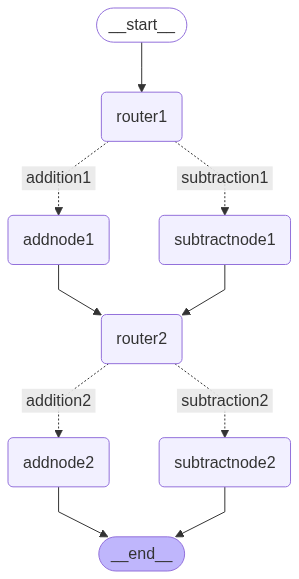

In [9]:
app=graph.compile()
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
agent1=AgentState(num1=10, num2=5, operation1="+", num3=1, num4=1, operation2="-")
answer= app.invoke(agent1)
print(answer)

{'num1': 10, 'num2': 5, 'operation1': '+', 'num3': 1, 'num4': 1, 'operation2': '-', 'final1': 15, 'final2': 0}
